<a href="https://colab.research.google.com/github/SHAHAB-UDDIN54/Artificial-intelligence-Ai-projects/blob/main/Day_6_Clustering_Preparation_%26_Optimization_class_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classwork: “Clean & Lean” Unsupervised Learning Pipeline**
Topic: Clustering Preparation & Optimization

**STEP 1: Python Code (Feature Selection + Scaling)**

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/customers.csv")

# Drop identifier column (CustomerID)
df_clean = df.drop("CustomerID", axis=1)

# Select numerical features only
X = df_clean[["Age", "Annual Income", "Spending Score"]]

# Initialize scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)



#Explanation:

#drop() → ID remove

#StandardScaler() → mean = 0, std = 1

#fit_transform() → learn + apply scaling


**STEP 2: Baseline Clustering (K-Means)**
🔹 What is Baseline?

Pehla rough idea lene ke liye simple clusterin

**1. Apply K-Means (Assume K = 3)**

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create KMeans model with K=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit model on scaled data
kmeans.fit(X_scaled)

# Cluster labels
labels = kmeans.labels_


**🔹 2. Record Inertia & Silhouette Score**

In [7]:
# Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_

# Silhouette Score
sil_score = silhouette_score(X_scaled, labels)

print("Inertia:", inertia)
print("Silhouette Score:", sil_score)


#Meaning:

#Inertia → cluster tightness (lower is better)

#Silhouette → cluster quality (−1 to +1, higher is better)


Inertia: 32.16559007125048
Silhouette Score: 0.37708848716168214


**3. Visualize Clusters (2 Features)**

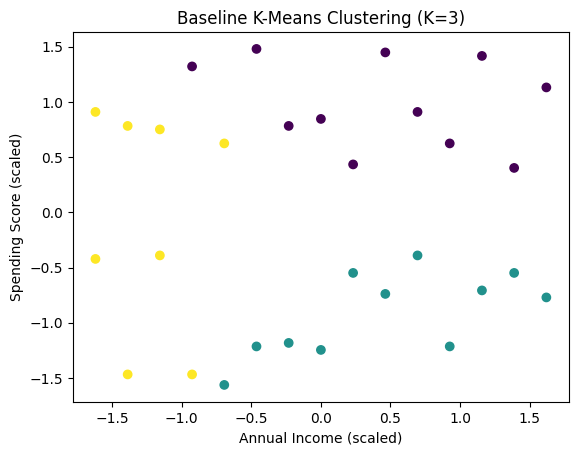

In [8]:
import matplotlib.pyplot as plt

plt.scatter(
    X_scaled[:, 1],   # Annual Income
    X_scaled[:, 2],   # Spending Score
    c=labels
)

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Baseline K-Means Clustering (K=3)")
plt.show()


**STEP 3: Cluster Optimization**
🔹 Goal:
Best K choose karna, guess nahi

**🔹 1. Elbow Method (K = 2 to 10)**

In [9]:
inertia_values = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia_values.append(model.inertia_)


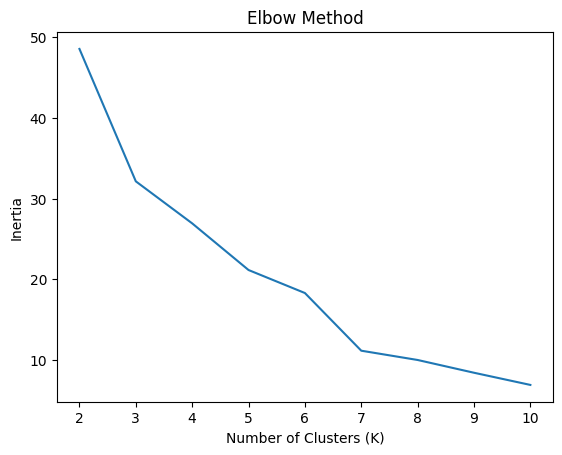

In [10]:
plt.plot(range(2, 11), inertia_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


**2. Silhouette Analysis**

In [11]:
silhouette_scores = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)


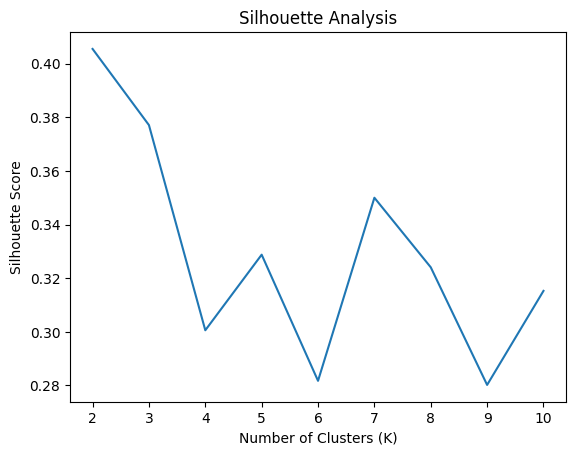

In [12]:
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


**3. Choose Optimal K**

Elbow + Silhouette dono agree karte hain
Example: K = 4

**4. Retrain K-Means with Optimal K**

In [13]:
optimal_k = 4

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(X_scaled)


**STEP 4: Hierarchical Clustering Comparison**
🔹 1. Agglomerative Clustering (Ward Linkage

In [14]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(
    n_clusters=4,
    linkage="ward"
)

agglo_labels = agglo.fit_predict(X_scaled)


**2. Plot Dendrogram**

**STEP 4.3: Choose the Number of Clusters using a Horizontal Cut**

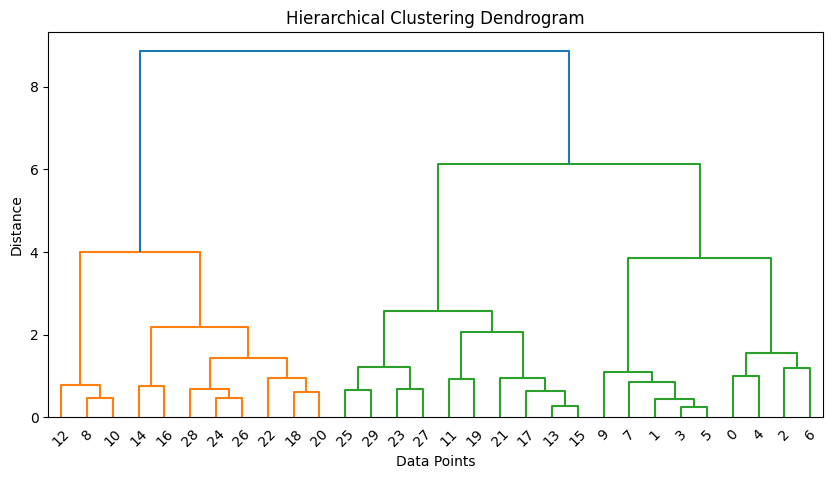

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


**STEP 4.4: Compare Cluster Structure with Optimized K-Means**

Ab hum compare karte hain:

Hierarchical Clustering (Ward)

Optimized K-Means (K = 4)

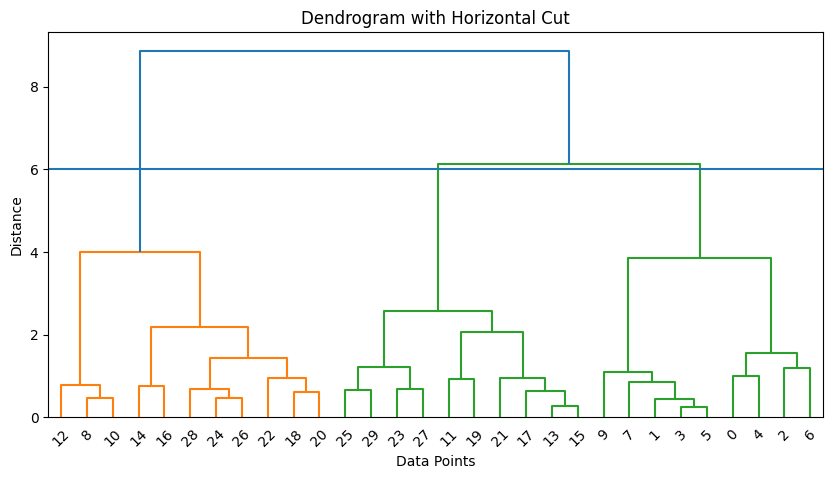

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create linkage matrix using Ward method
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)

# Horizontal cut line (example at distance = 6)
plt.axhline(y=6)

plt.title("Dendrogram with Horizontal Cut")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


**Practical Comparison Code**

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Optimized K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)


**Visual Comparison Plot**

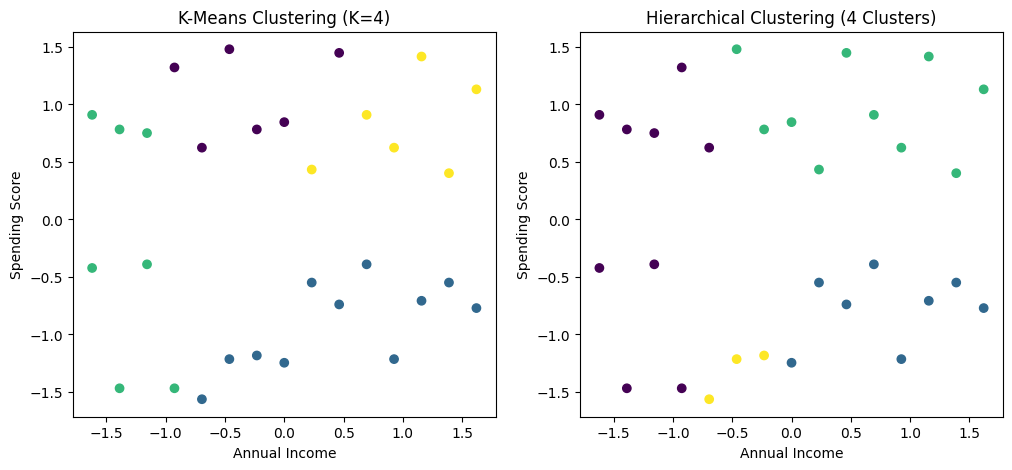

In [18]:
plt.figure(figsize=(12, 5))

# K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=kmeans_labels)
plt.title("K-Means Clustering (K=4)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

# Hierarchical plot
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=agglo_labels)
plt.title("Hierarchical Clustering (4 Clusters)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.show()
